> # **Softmax Regression**
> Softmax regression is an `extension of logistic regression` for `multi-class classification` problems. Given a set of input features x and corresponding labels y (one-hot encoded vectors).
<br><br>
> - The softmax function is used to compute the probabilities `(Softmax Function)`:
<br><br>
> 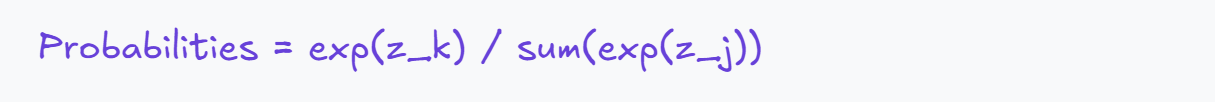
<br><br>
> - `Cost Function`:
> The cost function for softmax regression is the cross-entropy loss:
<br><br>
> 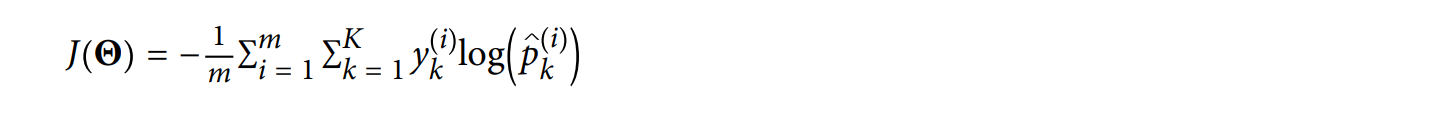
<br><br>
> - Derivative:
> The derivative of the cost function with respect to the logit z_k is:
<br><br>
> 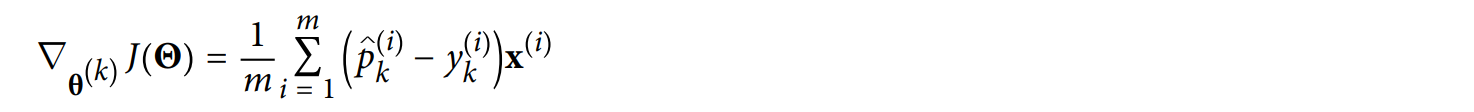
> This derivative represents the difference between the predicted probability and the true probability, which is used to update the model parameters during training.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions # For plotting decision boundries of multiclass

In [3]:
data = load_iris(as_frame=True)
data.data['target'] = data.target
df = data.data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df.iloc[:, 2:4]
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<HR>

> ### SOFTMAX REGRESSION FROM SCRATCH

In [7]:
class SoftmaxRegression:
    def __init__(self, lr=0.01, epochs=1000, lambda_reg=0.01) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.learning_rate = lr
        self.lambda_reg = lambda_reg  # Regularization parameter
    
    def softmax(self, z):
        """Compute the softmax for each row of the input z."""
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    def fit(self, X_train, y_train):
        X_train, y_train = np.array(X_train), np.array(y_train)
        """Fit the model to the training data."""
        # Add intercept term
        X_train = np.insert(X_train, 0, 1, axis=1)
        y_train = y_train.reshape(-1, 1)
        num_samples, num_features = X_train.shape
        num_classes = np.max(y_train) + 1

        # Initialize weights - ➡️ 
        self.weights_ = np.zeros((num_features, num_classes))
        
        # Convert y_train to one-hot encoding
        y_train_one_hot = np.zeros((num_samples, num_classes))
        y_train_one_hot[np.arange(num_samples), y_train.flatten()] = 1
        
        for epoch in range(self.epochs):
            # Shuffle the data
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            
            for i in indices:
                X_sample = X_train[i:i+1]
                y_sample = y_train_one_hot[i:i+1]
                
                # Compute predictions
                predictions = self.softmax(np.dot(X_sample, self.weights_))
                
                # Compute gradient - no.gradients = no. classes
                gradient = np.dot(X_sample.T, (predictions - y_sample)) / num_samples
                
                # Update weights
                self.weights_ -= self.learning_rate * gradient
        
        # Extract coefficients and intercepts
        self.intercept_ = self.weights_[0, :]
        self.coef_ = self.weights_[1:, :]
    
    def predict(self, X):
        """Predict the class labels for the input data."""
        X = np.insert(X, 0, 1, axis=1)  # Add intercept term
        predictions = self.softmax(np.dot(X, self.weights_))
        return np.argmax(predictions, axis=1)
    
    def predict_proba(self, X):
        """Predict the class probabilities for the input data."""
        X = np.insert(X, 0, 1, axis=1)  # Add intercept term
        return self.softmax(np.dot(X, self.weights_))

In [17]:
clf = SoftmaxRegression(lr = 0.1, epochs=1000)
clf.fit(X_train, y_train)
print(clf.coef_, clf.intercept_)

[[-0.94978692  0.59213703  0.3576499 ]
 [-1.82166653 -0.62070541  2.44237194]] [ 4.46997293 -0.35489637 -4.11507657]


In [18]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9664109121909632

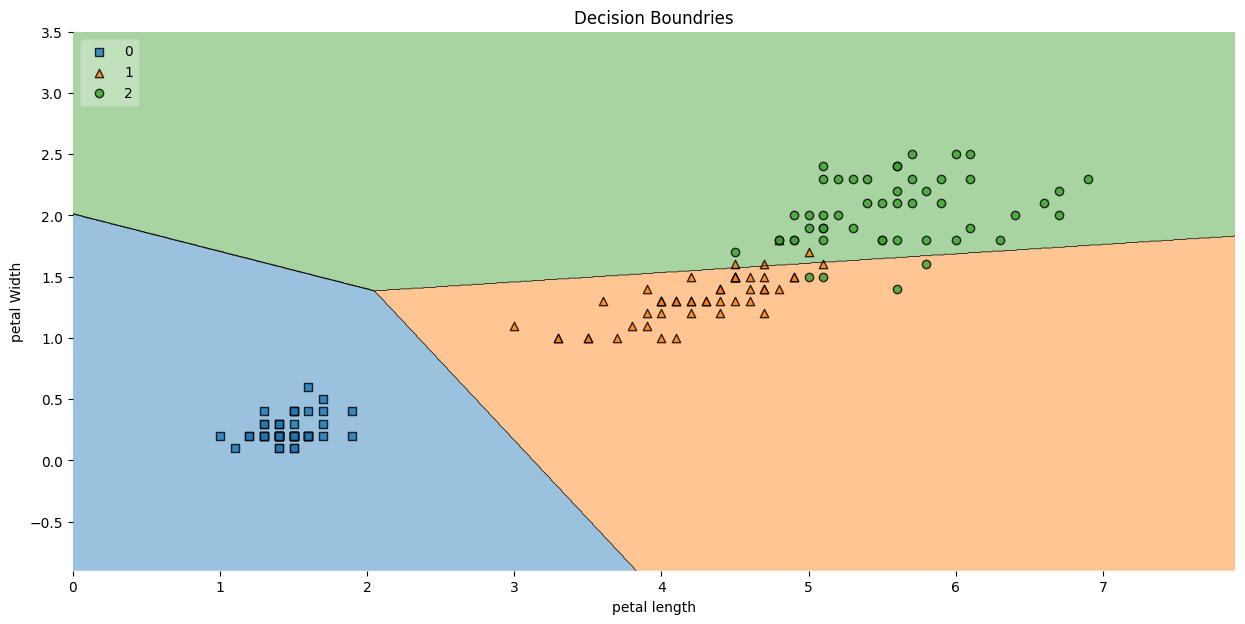

In [19]:
plt.figure(figsize=(15, 7))
plot_decision_regions(X.values, y.values, clf, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal Width")
plt.title("Decision Boundries")
plt.show()

<hr>

> ### `LogisticRegression(multi_class='multinomial')` - sklearn class

In [20]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train, y_train)
print(clf.coef_, clf.intercept_, sep='\n') # 3 intercept and 6 weights

[[-2.59524071 -1.09048831]
 [ 0.0739952  -0.74732063]
 [ 2.52124551  1.83780894]]
[ 10.39369743   2.91401203 -13.30770947]


In [23]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

1.0

c:\Users\shrir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


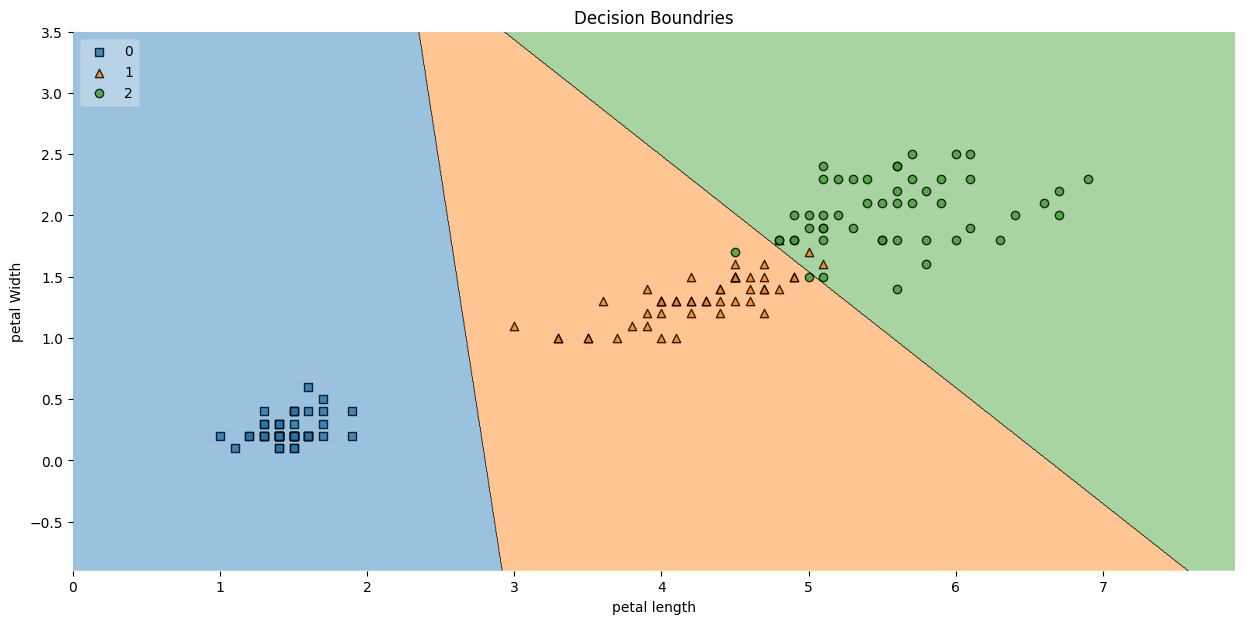

In [26]:
plt.figure(figsize=(15, 7))
plot_decision_regions(X.values, y.values, clf, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal Width")
plt.title("Decision Boundries")
plt.show()